In [1]:
from PIL import Image
import numpy as np

## Cluster 1: 107 racks

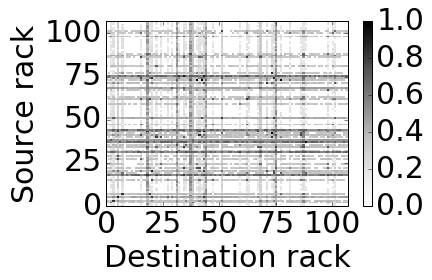

In [27]:
im = Image.open('cluster-1.png').convert('L')  # RGB to gray scale
im

In [28]:
im.mode, im.size

('L', (432, 280))

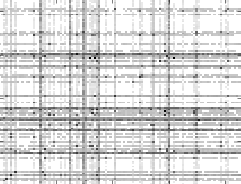

In [29]:
left   = 107
top    = 22
right  = 348
bottom = 206
im = im.crop((left, top, right, bottom))
im

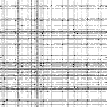

In [30]:
im = im.resize((107, 107))   # there are approximately 107 nodes
im

In [31]:
im_array = np.array(im.getdata()).reshape((107, 107))
im_array[20][::10]

array([201, 201, 201, 201, 101, 255, 201, 201, 194, 194, 194])

In [32]:
im_array = (255-im_array)/255 # scale to [0, 1]
im_array = im_array*8         # scale to [0, 8]
im_array[20][::10]

array([1.69411765, 1.69411765, 1.69411765, 1.69411765, 4.83137255,
       0.        , 1.69411765, 1.69411765, 1.91372549, 1.91372549,
       1.91372549])

In [33]:
im_array = np.power(10., im_array)  # scale to [0, 1e8]
im_array[20][::10]

array([4.94444610e+01, 4.94444610e+01, 4.94444610e+01, 4.94444610e+01,
       6.78223055e+04, 1.00000000e+00, 4.94444610e+01, 4.94444610e+01,
       8.19833179e+01, 8.19833179e+01, 8.19833179e+01])

In [34]:
im_array = np.where(im_array<=1, 0, im_array)  # the 1 should be 0 traffic
im_array[20][::10]

array([4.94444610e+01, 4.94444610e+01, 4.94444610e+01, 4.94444610e+01,
       6.78223055e+04, 0.00000000e+00, 4.94444610e+01, 4.94444610e+01,
       8.19833179e+01, 8.19833179e+01, 8.19833179e+01])

In [35]:
np.savetxt('cluster-1.txt', im_array, delimiter=',')

In [36]:
test = np.loadtxt('cluster-1.txt', delimiter=',')
test

array([[0.00000000e+00, 7.55842612e+00, 4.89999998e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.55842612e+00, 7.55842612e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.89999998e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.94444610e+01, 1.09449980e+02, 2.70005462e+06, ...,
        0.00000000e+00, 8.19833179e+01, 4.94444610e+01],
       [0.00000000e+00, 4.89999998e+00, 4.89999998e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.55842612e+00, 1.00907064e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])